In [1]:
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib
import scipy.io as sio
import h5py
import matplotlib.lines as mlines
from scipy.stats import sem
import scipy
from matplotlib.lines import Line2D

In [2]:
def rescale(X, b, a):
    maxx = X.max()
    minx = X.min()
    return (b - a) * (X - minx) / (maxx - minx) + a

In [3]:
#load data
acou = sio.loadmat("data\\acoustics\\acoustic_example_Fsupp1_2.mat")
en = acou['Envelope'][0]
sf = acou['SpectralFlux'][0]
sc = acou['SpectralCentroid'][0]
mfcc = acou['mfcc'][0]
y = acou['y'][0]
df_cor = pd.read_csv("data\\acoustics\\correlations_Fsupp1_2.csv")

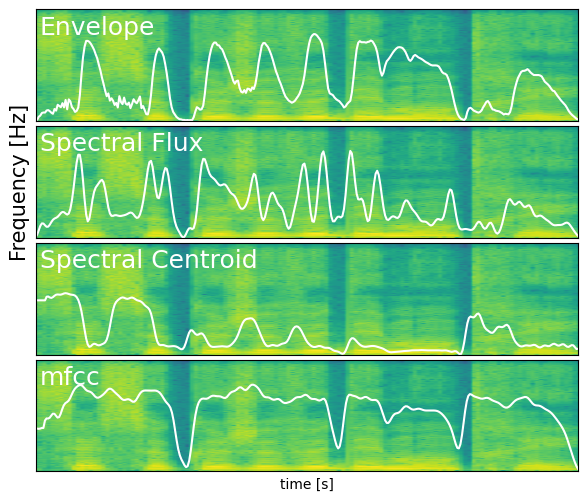

In [4]:
f, t, Sxx = signal.spectrogram(y, 1,scaling='density')

colors = ['w','w','w','w']
feats = [en,sf,sc,mfcc]
titles =['Envelope', 'Spectral Flux', 'Spectral Centroid','mfcc']

fig,axs = plt.subplots(4,1,figsize=(7,6))

for i, (ax,color,feat,title) in enumerate(zip(axs.ravel(),colors,feats,titles)):

    ax.imshow(25 * np.log10(Sxx),aspect='auto',origin='lower',cmap='viridis')
    ax.text(1,100,title, fontsize=18,color='white')
    ax.set_xticks([])
    ax.set_yticks([])

    if i==1:
        ax.set_ylabel('Frequency [Hz]',fontsize=15)
    if i==3:
        ax.set_xlabel('time [s]')

    ax.plot(np.linspace(0,len(Sxx),len(feat)),feat*100,color= color)
    ax.set_xlim(0,len(Sxx));
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.05)
#fig.savefig( "Fig1suppA.png",dpi=300,facecolor='white', edgecolor='white' )

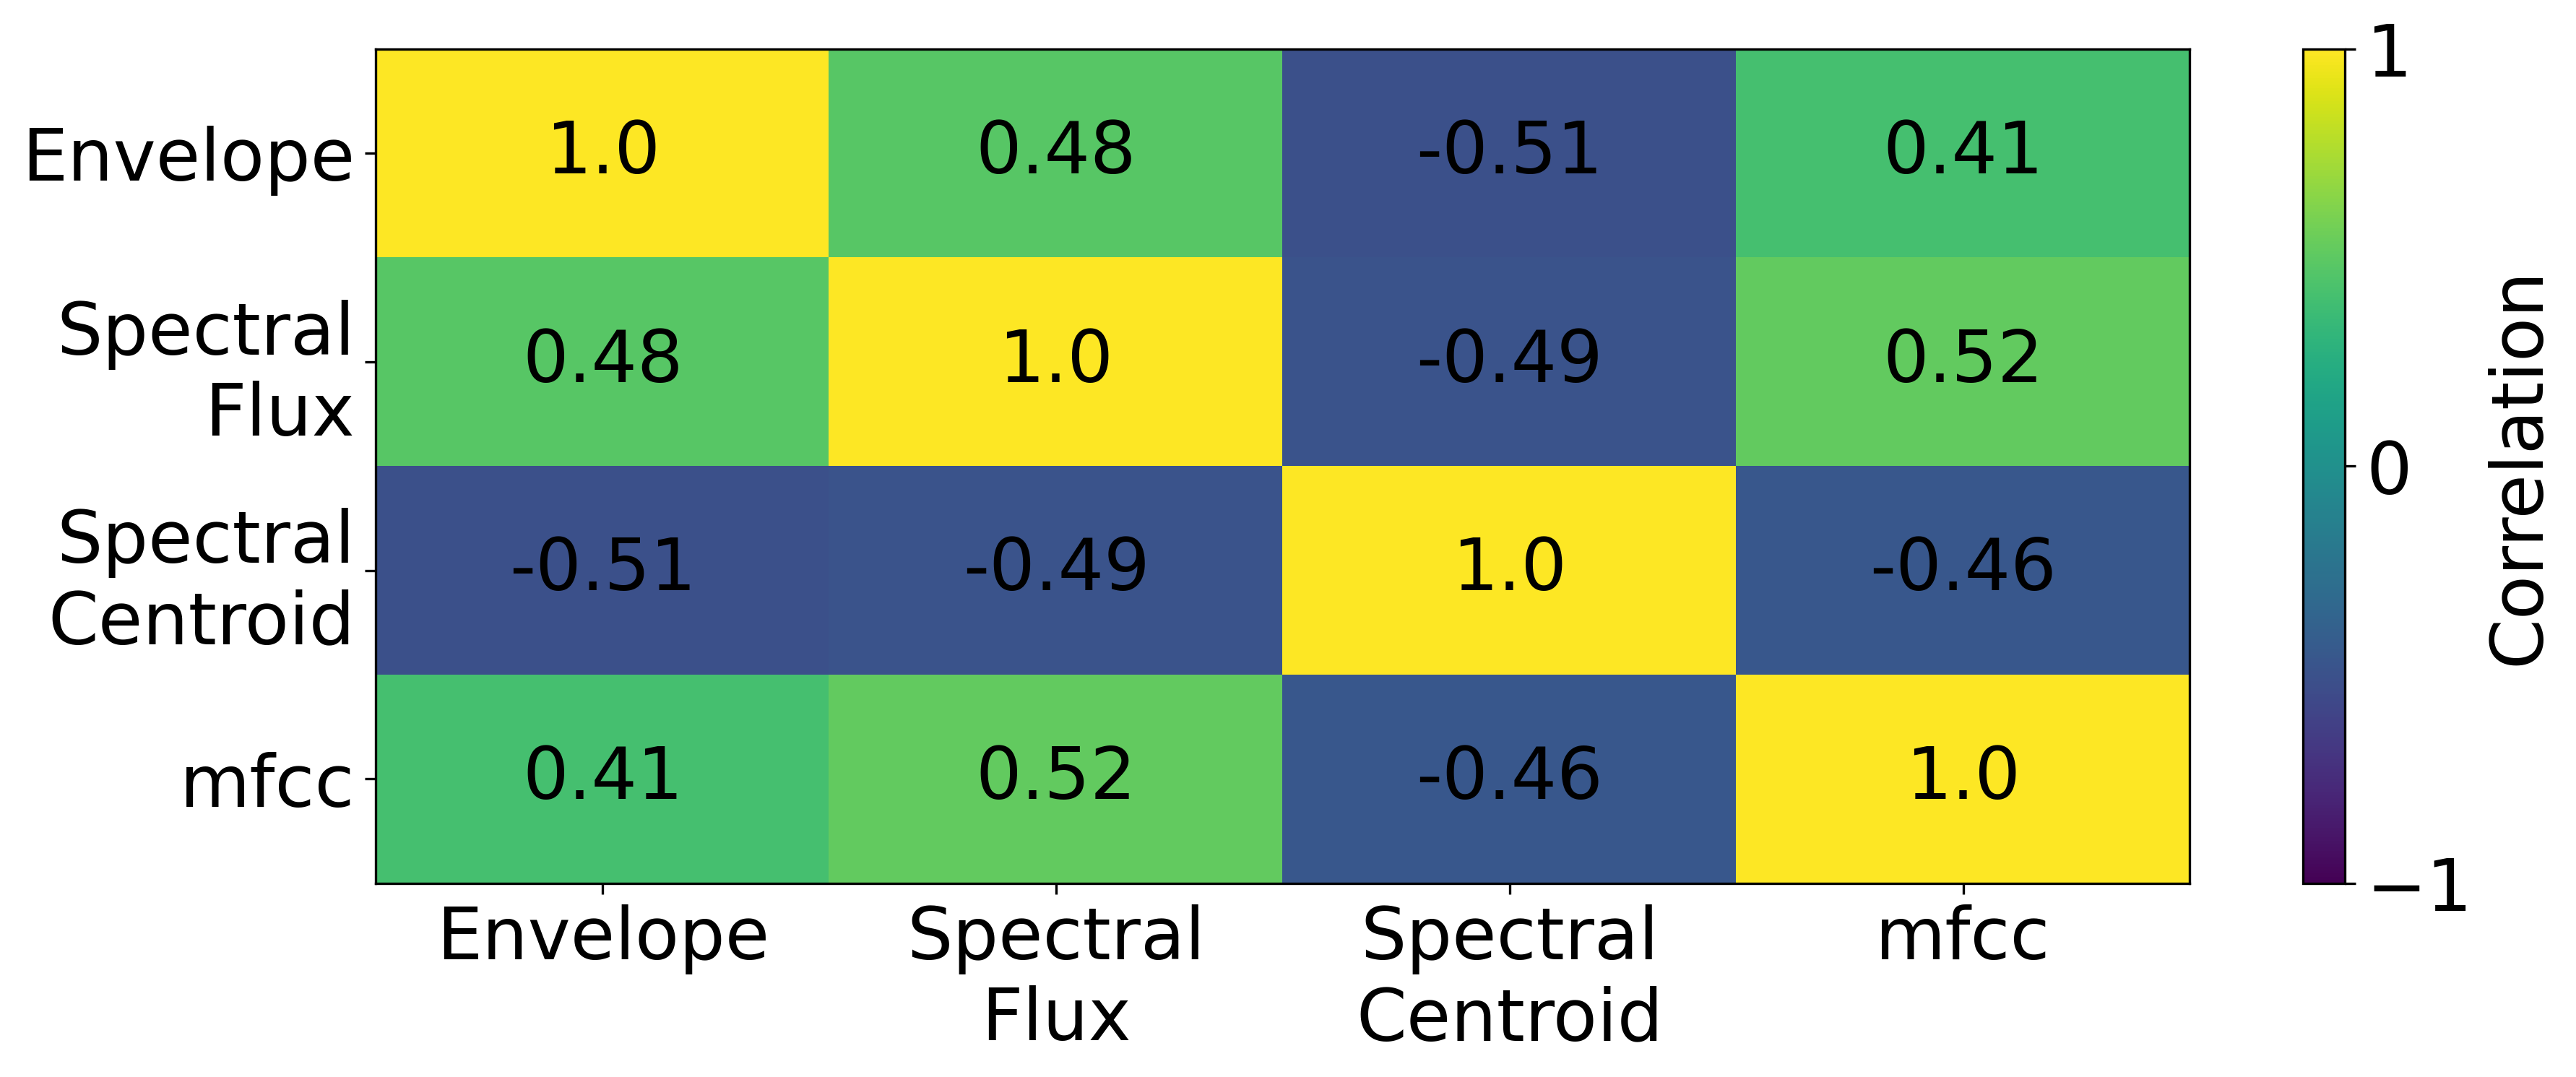

In [5]:
plt.rcParams.update({'font.size': 24})
figC,ax = plt.subplots(1,1,figsize=(13.5,5), facecolor='w', dpi=300)
variable_names = [
    'Envelope', 
    "Spectral Flux",
    "Spectral Centroid",
    "mfcc"]


variable_names2 = [
    'Envelope', 
    "Spectral\nFlux",
    "Spectral\nCentroid",
    "mfcc"]
corr12 = df_cor.values
im = ax.imshow(corr12, vmin=-1, vmax=1, aspect='auto')
# Loop over data dimensions and create text annotations.
for i in range(corr12.shape[0]):
    for j in range(corr12.shape[1]):
        text = ax.text(j, i, np.round(corr12[i, j],2),
                       ha="center", va="center", color="black")
ax.set_xticks(range(4))
ax.set_xticklabels(variable_names2)#, rotation=45)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_horizontalalignment('center')

ax.set_yticks(range(4))
ax.set_yticklabels(variable_names2)
cbar = plt.colorbar(im, ax=ax, ticks=[-1, 0, 1])
cbar.ax.set_ylabel('Correlation');
#figC.savefig( "FigSupp1B.png",  dpi=300,facecolor=None, edgecolor=None , bbox_inches='tight')


# Spectral centroid

In [6]:
# Load data
acoustics = h5py.File("data\\peak_comparison\\acoustic_representations_9conds.h5","r")
ind_acoustics = np.asarray(acoustics['acoustic_representations_9conds'])

#get information related to data 
dic = {}
for k in acoustics['acoustic_representations_9conds'].attrs.keys():
    dic[k] = acoustics['acoustic_representations_9conds'].attrs[k]

freqs = dic['freqs']
conds = dic['conditions']
acoustic_feature = dic['acoustic_feature']
acoustics.close()

In [7]:
# aestetics
names_conds = ['3HZ low', '3Hz medium', '3Hz high',
               '6Hz low', '6Hz medium', '6Hz high',
               '9Hz low', '9Hz medium', '9Hz high']
colors = ['paleturquoise',"dodgerblue","navy","mistyrose","lightcoral","darkred","yellowgreen","green","darkslategray"]

pa1 = mlines.Line2D([0], [0], color=colors[0], lw=4)
pa2 = mlines.Line2D([0], [0], color=colors[1], lw=4)
pa3 = mlines.Line2D([0], [0], color=colors[2], lw=4)

pb1 = mlines.Line2D([0], [0], color=colors[3], lw=4)
pb2 =mlines.Line2D([0], [0], color=colors[4], lw=4)
pb3 = mlines.Line2D([0], [0], color=colors[5], lw=4)

pc1 =mlines.Line2D([0], [0], color=colors[6], lw=4)
pc2 = mlines.Line2D([0], [0], color=colors[7], lw=4)
pc3 =mlines.Line2D([0], [0], color=colors[8], lw=4)

pp = mlines.Line2D([], [], marker='^', linestyle='None',mec='k', mfc='grey', mew=1,
                          markersize=10,label='Syllabic timescale')
                
custom_lines = [mlines.Line2D([0], [0], color=colors[0], lw=4),
                mlines.Line2D([0], [0], color=colors[1], lw=4),
                mlines.Line2D([0], [0], color=colors[2], lw=4),
               mlines.Line2D([], [], marker='^', linestyle='None',mec='k', mfc='grey', mew=1,
                          markersize=22,label='Syllabic timescale')]

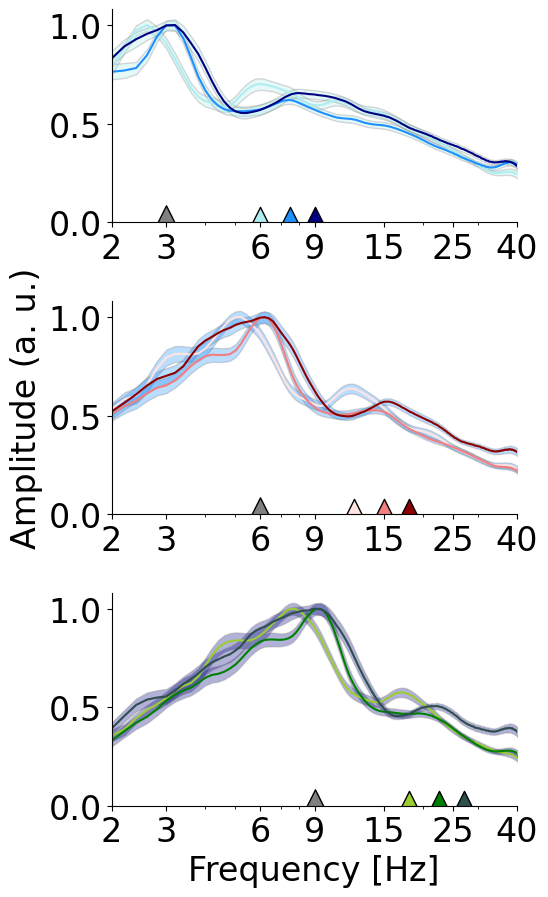

In [8]:
# Plot mean TFrepresentation of Spectral Centroid across aLL sentences from the different conditions

name_cond = ['low', 'medium', 'high','low', 'medium', 'high', 'low', 'medium', 'high']
matplotlib.rcParams.update({'font.size': 24})

fig,axs = plt.subplots(3,1, figsize=(6,9.5))
idxx = [[0,1,2],[3,4,5],[6,7,8]]
alphas = [1,0.7,0.4]
condi = [3,6,9]
ys = [0.001, 0.0015, 0.002]
legs = [[pa1,pa2,pa3,pp],[pb1,pb2,pb3,pp],[pc1,pc2,pc3,pp]]

colors = ['paleturquoise',"dodgerblue","navy","mistyrose","lightcoral","darkred","yellowgreen","green","darkslategray"]


for i, (num,ax) in enumerate(zip(range(3),axs.ravel())) :
        for j in range(3):
            aldat = np.array([rescale(i,1,0) for i in ind_acoustics[2][idxx[i][j]]])
            doto = rescale(np.mean(ind_acoustics[2][idxx[i][j]],0),1,0)
            ax.plot(freqs,doto,color= colors[idxx[i][j]],label=name_cond[idxx[i][j]]);
            ax.fill_between(freqs,doto +sem(aldat),doto -sem(aldat),alpha = 0.3, edgecolor = 'grey', facecolor = colors[i] ) 
           
        if num == 0:
            ax.scatter(6,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='paleturquoise',zorder=1)
            ax.scatter(7.5,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='dodgerblue',zorder=1)
            ax.scatter(9,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='navy',zorder=1)

        
        if num == 1:
            ax.set_ylabel('Amplitude (a. u.)',fontsize=24);
            ax.scatter(12,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='mistyrose',zorder=1)
            ax.scatter(15,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='lightcoral',zorder=1)
            ax.scatter(18,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='darkred',zorder=1)
        
        if num == 2:
            ax.scatter(18,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='yellowgreen',zorder=1)
            ax.scatter(22.5,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='green',zorder=1)
            ax.scatter(27,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='darkslategray',zorder=1)


        ax.spines['right'].set_visible(False)
        ax.scatter(condi[i],0.0005, marker='^',s = 575,linewidth=1,edgecolor='black',zorder=1, color='grey')
        ax.spines['top'].set_visible(False)
        ax.set_xlim(2,40)
        ax.set_ylim(0)
        ax.semilogx()   
        ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0)) 
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter());

        ax.set_xticks([2,3,6,9,15,25,40]);
        ax.set_yticks([0.0,0.5,1]);
ax.set_xlabel("Frequency [Hz]",fontsize=24);
fig.tight_layout()
#fig.savefig( "FigSupp1c.png",  dpi=300, bbox_inches='tight')

In [9]:
# read accuracy data for all acoustic features
acc_phon = pd.read_csv("data\\acoustics\\phonemic_accuracy_scores.csv")
acc_syll = pd.read_csv("data\\acoustics\\syllabic_accuracy_scores.csv")

In [10]:
# keep only spectral_flux
phon = acc_phon.loc[acc_phon['features']=='spectral_centroid']['accuracies'].values
syll = acc_syll.loc[acc_phon['features']=='spectral_centroid']['accuracies'].values

dic = {'conditions': np.repeat(['syllabic time scale','phonemic time scale'],10),
       'decoding accuracy (%)': np.concatenate((syll,phon)) }
df = pd.DataFrame.from_dict(dic)

def jiters(x):
    np.random.seed(seed=100)
    return x+ np.random.normal(0,0.05,len(x))

std1 = np.std(df['decoding accuracy (%)'][0:10],0)
std2 = np.std(df['decoding accuracy (%)'][10::],0)
dataplot = df.groupby('conditions')['decoding accuracy (%)'].mean().values[::-1]



syllval = df['decoding accuracy (%)'].values[0:10]
phonval = df['decoding accuracy (%)'].values[10::]


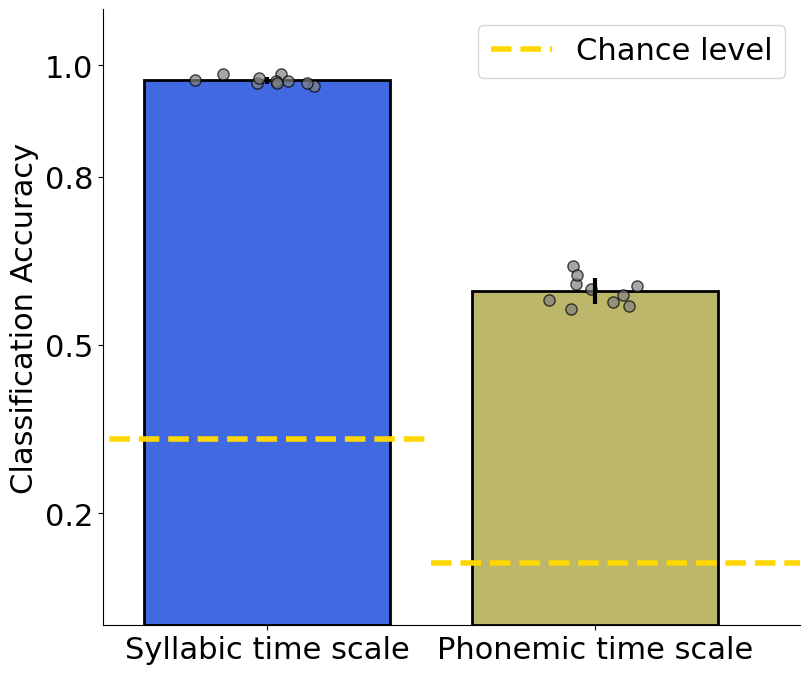

In [11]:
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(1,1,figsize=(9,8))
custom_line = [Line2D([1], [0], color='gold', lw=4, linestyle='--')]
ax.bar(x=[0.5,0.9], height=dataplot ,yerr =[std1,std2], color= ['royalblue','darkkhaki'],edgecolor='k',linewidth=2,width=0.3,error_kw = {"linewidth":3})
ax.scatter(jiters(np.repeat([0.5,0.9],10)),df['decoding accuracy (%)'].values,s=65,color="grey", edgecolor='k',alpha=0.7)


#sns.swarmplot(x = "conditions", y= 'decoding accuracy (%)', data=df,ax = ax,size=7, color='grey',alpha=0.4, linewidth = 2,edgecolor = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,1.1)
ax.set_xlim(0.3,1.15)
#ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.hlines(1/3,0.2,0.7, linestyle='--', color = 'gold',linewidth=4);
ax.hlines(1/9,0.7,1.15, linestyle='--', color = 'gold',linewidth=4);
ax.set_xticks([0.5,0.9],['Syllabic time scale','Phonemic time scale']);
ax.set_yticks([0.2,0.5,0.8,1]);
ax.set_ylabel("Classification Accuracy");
ax.legend(custom_line, ['Chance level']);
#fig.savefig( "FigureSupp1D.png",  dpi=300,bbox_inches=None,  facecolor='white', edgecolor='white' )


In [12]:
# retrieve peaks extracted from the TF representation of the spectral flux
corr = pd.read_csv("data\\acoustics\\cors_sc.csv")

In [13]:
#rfirst = correlation between real data form the first peaks and expected first peaks
#rsecond = correlation between real data form the second peaks and expected second peaks
#ffirst = correlation between real data form the first peaks and expected second peaks
#fsecond =  correlation between real data form the second peaks and expected first peaks

In [14]:
# get correlations between predicted peaks and observed peaks
rfirst = np.corrcoef(corr['real_peak_low'].values,corr['pred_peak_low'].values)[0][1]
rsecond = np.corrcoef(corr['real_peak_high'].values,corr['pred_peak_high'].values)[0][1]
ffirst = np.corrcoef(corr['real_peak_low'].values,corr['pred_peak_high'].values)[0][1]
fsecond = np.corrcoef(corr['real_peak_high'].values,corr['pred_peak_low'].values)[0][1]

# get data and format for figure
firstspp = corr['pred_peak_low'].values
secspp = corr['pred_peak_high'].values
fi = corr['real_peak_low'].values
se = corr['real_peak_high'].values
doot = [fi,se,fi,se]
against = [firstspp,firstspp,secspp,secspp]

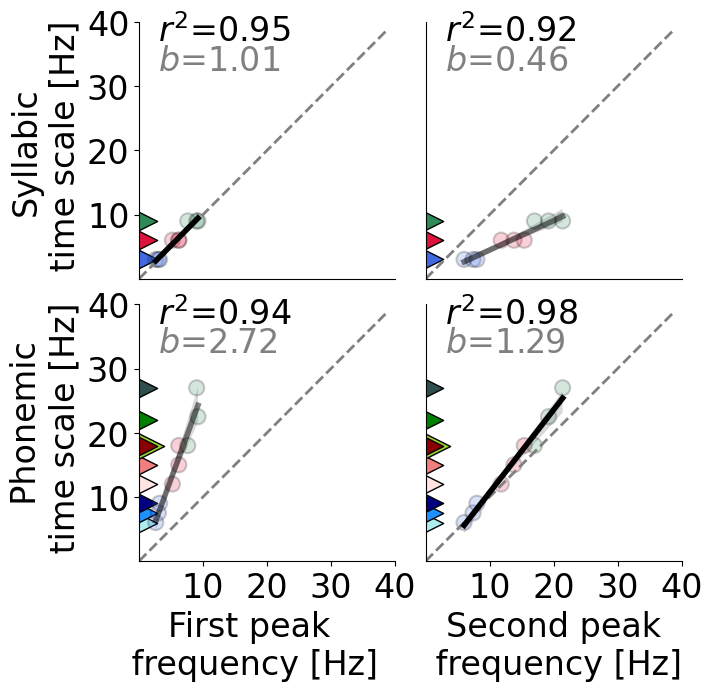

In [15]:
# plot data
colours = np.repeat(["royalblue","crimson","seagreen"],3)
alphas = [1,0.5,0.5,1]
matplotlib.rcParams.update({'font.size': 24})

xlabs = ["","","First peak\n frequency [Hz]","Second peak\n frequency [Hz]"]
ylabs = ["Syllabic\n time scale [Hz]","","  Phonemic\n time scale [Hz]",""]

cors = [str(i**2)[0:4] for i in [rfirst ,ffirst,fsecond,rsecond]] 
xs = [3,3,3,3]
ys = [37,37,37,37]
lis = [40,40,40,40]

titles = []
fig,axs = plt.subplots(2,2,figsize=(7,7))
for i, ax in enumerate(axs.flat):
    ax.plot(np.arange(0,lis[i]),np.arange(0,lis[i]),'--',linewidth=2, color = 'gray')

    x = doot[i]
    y = against[i]

    x = x[np.argsort(y)]
    y = np.array(y)[np.argsort(y)]

    a, b,rval,pval,seintersder = scipy.stats.linregress(x, y)
    coco = np.corrcoef(x,y)[0][1]
    sns.regplot(x = x, y=y,ax = ax,scatter = False,color="k",line_kws={"alpha":alphas[i],"linewidth":4})
    ax.scatter(x,y,color=colours,alpha=0.2,s=120,linewidths=1.5,edgecolors='black');
    ax.set_xticks([10,20,30,40])
    ax.set_yticks([10,20,30,40])

    if i in [0,1]:
        ax.scatter(0.4,3, marker='>',s = 475,linewidth=1,edgecolor='black', color='royalblue',zorder=0)
        ax.scatter(0.4,6, marker='>',s = 475,linewidth=1,edgecolor='black', color='crimson',zorder=0)
        ax.scatter(0.4,9, marker='>',s = 475,linewidth=1,edgecolor='black', color='seagreen',zorder=0)
        ax.set_xticks([])
    else:
        ax.scatter(0.4,6, marker='>',s = 475,linewidth=1,edgecolor='black', color='paleturquoise',zorder=0)
        ax.scatter(0.4,7.5, marker='>',s = 475,linewidth=1,edgecolor='black', color='dodgerblue',zorder=0)
        ax.scatter(0.4,9, marker='>',s = 475,linewidth=1,edgecolor='black', color='navy',zorder=0)
        ax.scatter(0.4,12, marker='>',s = 475,linewidth=1,edgecolor='black', color='mistyrose',zorder=0)
        ax.scatter(0.4,15, marker='>',s = 475,linewidth=1,edgecolor='black', color='lightcoral',zorder=0)
        ax.scatter(1.5,18, marker='>',s = 475,linewidth=1,edgecolor='black', color='yellowgreen',zorder=0)
        ax.scatter(0.4,18, marker='>',s = 475,linewidth=1,edgecolor='black', color='darkred',zorder=0)
        ax.scatter(0.4,22, marker='>',s = 475,linewidth=1,edgecolor='black', color='green',zorder=0)
        ax.scatter(0.4,27, marker='>',s = 475,linewidth=1,edgecolor='black', color='darkslategray',zorder=0)
    axs.ravel()[1].set_yticks([])
    axs.ravel()[3].set_yticks([])

    ax.set_xlim(0,lis[i])
    ax.set_ylim(0,lis[i])

    axs.ravel()[2].xaxis.set_label_coords(0.43,-0.19)
    axs.ravel()[3].xaxis.set_label_coords(0.59,-0.19)

    ax.set_xlabel(xlabs[i],fontsize=24)
    ax.set_ylabel(ylabs[i],fontsize=24)
    ax.text(xs[i],ys[i],r'$r^{2}$=' + str(np.round(coco**2,2)),size=24)#,alpha=alphas[i])cors[i]
    ax.text(xs[i],ys[i]-4.5,r'$b$=' +str(np.round(a,2)), color = "grey",size=24)#,alpha=alphas[i])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.subplots_adjust(hspace=0.1,wspace=0.12)
#fig.savefig( "FigSupp1D.png",  dpi=300, bbox_inches='tight')

# mfcc

In [17]:
# Load data
acoustics = h5py.File("data\\peak_comparison\\acoustic_representations_9conds.h5","r")
ind_acoustics = np.asarray(acoustics['acoustic_representations_9conds'])

#get information related to data 
dic = {}
for k in acoustics['acoustic_representations_9conds'].attrs.keys():
    dic[k] = acoustics['acoustic_representations_9conds'].attrs[k]

freqs = dic['freqs']
conds = dic['conditions']
acoustic_feature = dic['acoustic_feature']
acoustics.close()

In [18]:
acoustic_feature

array(['spectral_flux', 'amplitude_enveloppe', 'spectral_centroid',
       'mfcc'], dtype=object)

In [19]:
# aestetics
names_conds = ['3HZ low', '3Hz medium', '3Hz high',
               '6Hz low', '6Hz medium', '6Hz high',
               '9Hz low', '9Hz medium', '9Hz high']
colors = ['paleturquoise',"dodgerblue","navy","mistyrose","lightcoral","darkred","yellowgreen","green","darkslategray"]

pa1 = mlines.Line2D([0], [0], color=colors[0], lw=4)
pa2 = mlines.Line2D([0], [0], color=colors[1], lw=4)
pa3 = mlines.Line2D([0], [0], color=colors[2], lw=4)

pb1 = mlines.Line2D([0], [0], color=colors[3], lw=4)
pb2 =mlines.Line2D([0], [0], color=colors[4], lw=4)
pb3 = mlines.Line2D([0], [0], color=colors[5], lw=4)

pc1 =mlines.Line2D([0], [0], color=colors[6], lw=4)
pc2 = mlines.Line2D([0], [0], color=colors[7], lw=4)
pc3 =mlines.Line2D([0], [0], color=colors[8], lw=4)

pp = mlines.Line2D([], [], marker='^', linestyle='None',mec='k', mfc='grey', mew=1,
                          markersize=10,label='Syllabic timescale')
                
custom_lines = [mlines.Line2D([0], [0], color=colors[0], lw=4),
                mlines.Line2D([0], [0], color=colors[1], lw=4),
                mlines.Line2D([0], [0], color=colors[2], lw=4),
               mlines.Line2D([], [], marker='^', linestyle='None',mec='k', mfc='grey', mew=1,
                          markersize=22,label='Syllabic timescale')]

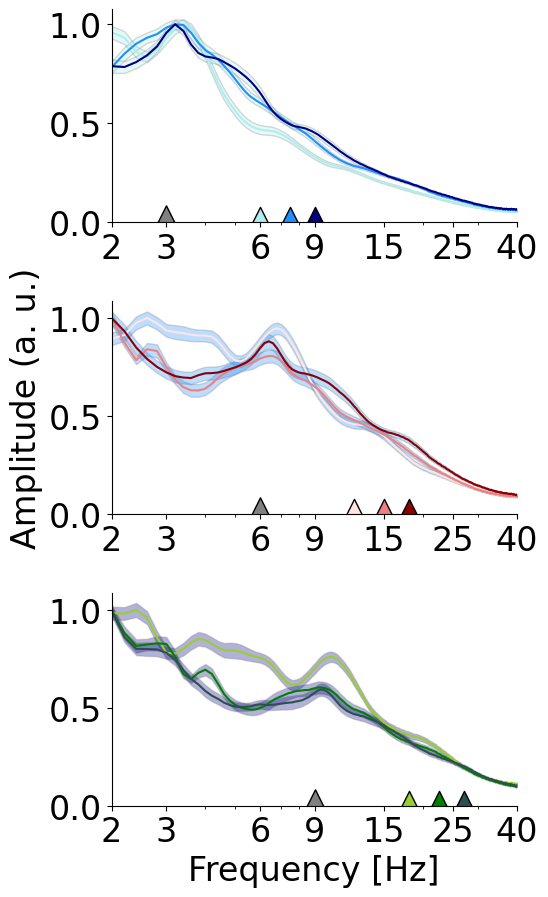

In [20]:
# Plot mean TFrepresentation of Spectral Centroid across aLL sentences from the different conditions

name_cond = ['low', 'medium', 'high','low', 'medium', 'high', 'low', 'medium', 'high']
matplotlib.rcParams.update({'font.size': 24})

fig,axs = plt.subplots(3,1, figsize=(6,9.5))
idxx = [[0,1,2],[3,4,5],[6,7,8]]
alphas = [1,0.7,0.4]
condi = [3,6,9]
ys = [0.001, 0.0015, 0.002]
legs = [[pa1,pa2,pa3,pp],[pb1,pb2,pb3,pp],[pc1,pc2,pc3,pp]]

colors = ['paleturquoise',"dodgerblue","navy","mistyrose","lightcoral","darkred","yellowgreen","green","darkslategray"]


for i, (num,ax) in enumerate(zip(range(3),axs.ravel())) :
        for j in range(3):
            aldat = np.array([rescale(i*np.sqrt(freqs),1,0) for i in ind_acoustics[3][idxx[i][j]]])
            doto = rescale(np.mean(ind_acoustics[3][idxx[i][j]]*np.sqrt(freqs),0),1,0)
            ax.plot(freqs,doto,color= colors[idxx[i][j]],label=name_cond[idxx[i][j]]);
            ax.fill_between(freqs,doto +sem(aldat),doto -sem(aldat),alpha = 0.3, edgecolor = 'grey', facecolor = colors[i] ) 
           
        if num == 0:
            ax.scatter(6,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='paleturquoise',zorder=1)
            ax.scatter(7.5,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='dodgerblue',zorder=1)
            ax.scatter(9,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='navy',zorder=1)

        
        if num == 1:
            ax.set_ylabel('Amplitude (a. u.)',fontsize=24);
            ax.scatter(12,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='mistyrose',zorder=1)
            ax.scatter(15,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='lightcoral',zorder=1)
            ax.scatter(18,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='darkred',zorder=1)
        
        if num == 2:
            ax.scatter(18,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='yellowgreen',zorder=1)
            ax.scatter(22.5,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='green',zorder=1)
            ax.scatter(27,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='darkslategray',zorder=1)


        ax.spines['right'].set_visible(False)
        ax.scatter(condi[i],0.0005, marker='^',s = 575,linewidth=1,edgecolor='black',zorder=1, color='grey')
        ax.spines['top'].set_visible(False)
        ax.set_xlim(2,40)
        ax.set_ylim(0)
        ax.semilogx()   
        ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0)) 
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter());

        ax.set_xticks([2,3,6,9,15,25,40]);
        ax.set_yticks([0.0,0.5,1]);
ax.set_xlabel("Frequency [Hz]",fontsize=24);
fig.tight_layout()
#fig.savefig( "FigSupp1c.png",  dpi=300, bbox_inches='tight')

In [21]:
# read accuracy data for all acoustic features
acc_phon = pd.read_csv("data\\acoustics\\phonemic_accuracy_scores.csv")
acc_syll = pd.read_csv("data\\acoustics\\syllabic_accuracy_scores.csv")

In [22]:
# keep only spectral_flux
phon = acc_phon.loc[acc_phon['features']=='mfcc']['accuracies'].values
syll = acc_syll.loc[acc_phon['features']=='mfcc']['accuracies'].values

dic = {'conditions': np.repeat(['syllabic time scale','phonemic time scale'],10),
       'decoding accuracy (%)': np.concatenate((syll,phon)) }
df = pd.DataFrame.from_dict(dic)

def jiters(x):
    np.random.seed(seed=100)
    return x+ np.random.normal(0,0.05,len(x))

std1 = np.std(df['decoding accuracy (%)'][0:10],0)
std2 = np.std(df['decoding accuracy (%)'][10::],0)
dataplot = df.groupby('conditions')['decoding accuracy (%)'].mean().values[::-1]



syllval = df['decoding accuracy (%)'].values[0:10]
phonval = df['decoding accuracy (%)'].values[10::]


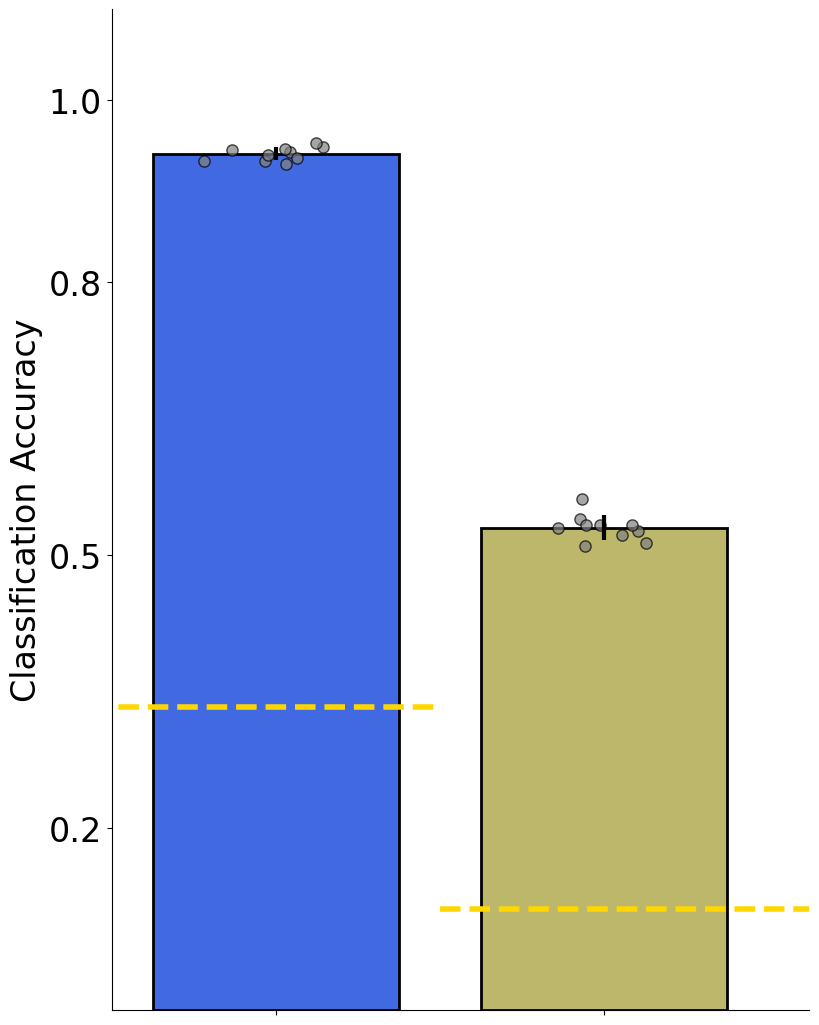

In [23]:
plt.rcParams.update({'font.size': 24})
fig,ax = plt.subplots(1,1,figsize=(9,13))
#custom_line = [Line2D([1], [0], color='gold', lw=4, linestyle='--')]
ax.bar(x=[0.5,0.9], height=dataplot ,yerr =[std1,std2], color= ['royalblue','darkkhaki'],edgecolor='k',linewidth=2,width=0.3,error_kw = {"linewidth":3})
ax.scatter(jiters(np.repeat([0.5,0.9],10)),df['decoding accuracy (%)'].values,s=65,color="grey", edgecolor='k',alpha=0.7)


#sns.swarmplot(x = "conditions", y= 'decoding accuracy (%)', data=df,ax = ax,size=7, color='grey',alpha=0.4, linewidth = 2,edgecolor = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,1.1)
ax.set_xlim(0.3,1.15)
#ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.hlines(1/3,0.2,0.7, linestyle='--', color = 'gold',linewidth=4);
ax.hlines(1/9,0.7,1.15, linestyle='--', color = 'gold',linewidth=4);
#ax.set_xticks([0.5,0.9],['Syllabic time scale','Phonemic time scale']);
ax.set_xticks([0.5,0.9],['','']);

ax.set_yticks([0.2,0.5,0.8,1]);
ax.set_ylabel("Classification Accuracy");
#ax.legend(custom_line, ['Chance level']);
#fig.savefig( "FigureSupp1D.png",  dpi=300,bbox_inches=None,  facecolor='white', edgecolor='white' )


In [24]:
# retrieve peaks extracted from the TF representation of the spectral flux
corr = pd.read_csv("data\\acoustics\\cors_sc.csv")

In [25]:
#rfirst = correlation between real data form the first peaks and expected first peaks
#rsecond = correlation between real data form the second peaks and expected second peaks
#ffirst = correlation between real data form the first peaks and expected second peaks
#fsecond =  correlation between real data form the second peaks and expected first peaks

In [26]:
# get correlations between predicted peaks and observed peaks
rfirst = np.corrcoef(corr['real_peak_low'].values,corr['pred_peak_low'].values)[0][1]
rsecond = np.corrcoef(corr['real_peak_high'].values,corr['pred_peak_high'].values)[0][1]
ffirst = np.corrcoef(corr['real_peak_low'].values,corr['pred_peak_high'].values)[0][1]
fsecond = np.corrcoef(corr['real_peak_high'].values,corr['pred_peak_low'].values)[0][1]

# get data and format for figure
firstspp = corr['pred_peak_low'].values
secspp = corr['pred_peak_high'].values
fi = corr['real_peak_low'].values
se = corr['real_peak_high'].values
doot = [fi,se,fi,se]
against = [firstspp,firstspp,secspp,secspp]

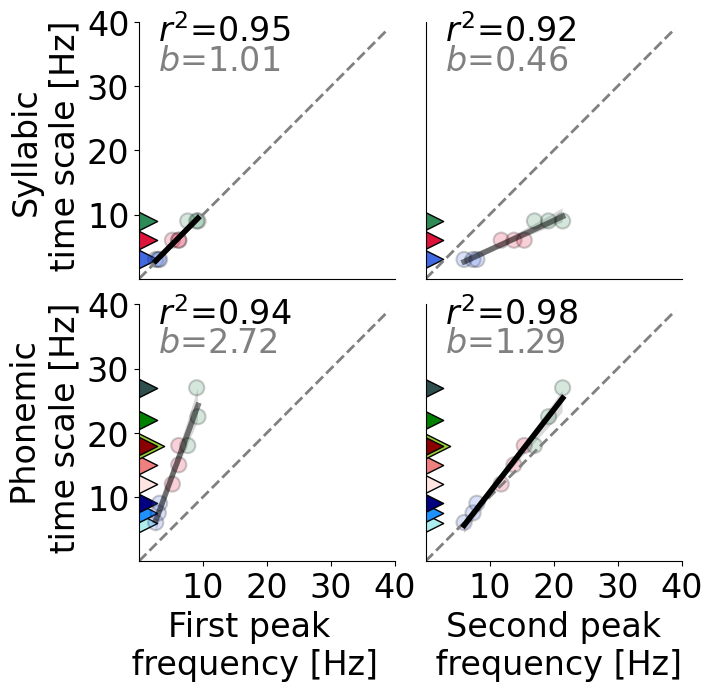

In [27]:
# plot data
colours = np.repeat(["royalblue","crimson","seagreen"],3)
alphas = [1,0.5,0.5,1]
matplotlib.rcParams.update({'font.size': 24})

xlabs = ["","","First peak\n frequency [Hz]","Second peak\n frequency [Hz]"]
ylabs = ["Syllabic\n time scale [Hz]","","  Phonemic\n time scale [Hz]",""]

cors = [str(i**2)[0:4] for i in [rfirst ,ffirst,fsecond,rsecond]] 
xs = [3,3,3,3]
ys = [37,37,37,37]
lis = [40,40,40,40]

titles = []
fig,axs = plt.subplots(2,2,figsize=(7,7))
for i, ax in enumerate(axs.flat):
    ax.plot(np.arange(0,lis[i]),np.arange(0,lis[i]),'--',linewidth=2, color = 'gray')

    x = doot[i]
    y = against[i]

    x = x[np.argsort(y)]
    y = np.array(y)[np.argsort(y)]

    a, b,rval,pval,seintersder = scipy.stats.linregress(x, y)
    coco = np.corrcoef(x,y)[0][1]
    sns.regplot(x = x, y=y,ax = ax,scatter = False,color="k",line_kws={"alpha":alphas[i],"linewidth":4})
    ax.scatter(x,y,color=colours,alpha=0.2,s=120,linewidths=1.5,edgecolors='black');
    ax.set_xticks([10,20,30,40])
    ax.set_yticks([10,20,30,40])

    if i in [0,1]:
        ax.scatter(0.4,3, marker='>',s = 475,linewidth=1,edgecolor='black', color='royalblue',zorder=0)
        ax.scatter(0.4,6, marker='>',s = 475,linewidth=1,edgecolor='black', color='crimson',zorder=0)
        ax.scatter(0.4,9, marker='>',s = 475,linewidth=1,edgecolor='black', color='seagreen',zorder=0)
        ax.set_xticks([])
    else:
        ax.scatter(0.4,6, marker='>',s = 475,linewidth=1,edgecolor='black', color='paleturquoise',zorder=0)
        ax.scatter(0.4,7.5, marker='>',s = 475,linewidth=1,edgecolor='black', color='dodgerblue',zorder=0)
        ax.scatter(0.4,9, marker='>',s = 475,linewidth=1,edgecolor='black', color='navy',zorder=0)
        ax.scatter(0.4,12, marker='>',s = 475,linewidth=1,edgecolor='black', color='mistyrose',zorder=0)
        ax.scatter(0.4,15, marker='>',s = 475,linewidth=1,edgecolor='black', color='lightcoral',zorder=0)
        ax.scatter(1.5,18, marker='>',s = 475,linewidth=1,edgecolor='black', color='yellowgreen',zorder=0)
        ax.scatter(0.4,18, marker='>',s = 475,linewidth=1,edgecolor='black', color='darkred',zorder=0)
        ax.scatter(0.4,22, marker='>',s = 475,linewidth=1,edgecolor='black', color='green',zorder=0)
        ax.scatter(0.4,27, marker='>',s = 475,linewidth=1,edgecolor='black', color='darkslategray',zorder=0)
    axs.ravel()[1].set_yticks([])
    axs.ravel()[3].set_yticks([])

    ax.set_xlim(0,lis[i])
    ax.set_ylim(0,lis[i])

    axs.ravel()[2].xaxis.set_label_coords(0.43,-0.19)
    axs.ravel()[3].xaxis.set_label_coords(0.59,-0.19)

    ax.set_xlabel(xlabs[i],fontsize=24)
    ax.set_ylabel(ylabs[i],fontsize=24)
    ax.text(xs[i],ys[i],r'$r^{2}$=' + str(np.round(coco**2,2)),size=24)#,alpha=alphas[i])cors[i]
    ax.text(xs[i],ys[i]-4.5,r'$b$=' +str(np.round(a,2)), color = "grey",size=24)#,alpha=alphas[i])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.subplots_adjust(hspace=0.1,wspace=0.12)
#fig.savefig( "FigSupp1D.png",  dpi=300, bbox_inches='tight')